In [83]:
# Required imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model


import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import shutil
import os
import tensorflow as tf

from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.applications import EfficientNetB0

from mpl_toolkits.mplot3d import Axes3D



In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Capstone/


/content/drive/MyDrive/Capstone


In [82]:
#recall the architecture
model_layerDeep_1 = Sequential([
    Conv2D(2, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])


In [13]:
#confirms that maxpooling layers do not have weights or biasis
for i, layer in enumerate(model_layerDeep_1.layers):
    if len(layer.get_weights()) > 0:
        weights = layer.get_weights()[0]  # weights
        biases = layer.get_weights()[1]  # biases
        print(f"Layer {i+1} weights shape: {weights.shape}")
        print(f"Layer {i+1} biases shape: {biases.shape}")
    else:
        print(f"Layer {i+1} does not have weights or biases")


Layer 1 weights shape: (3, 3, 3, 2)
Layer 1 biases shape: (2,)
Layer 2 does not have weights or biases
Layer 3 weights shape: (3, 3, 2, 4)
Layer 3 biases shape: (4,)
Layer 4 does not have weights or biases
Layer 5 weights shape: (3, 3, 4, 8)
Layer 5 biases shape: (8,)
Layer 6 does not have weights or biases
Layer 7 weights shape: (3, 3, 8, 16)
Layer 7 biases shape: (16,)
Layer 8 does not have weights or biases
Layer 9 weights shape: (3, 3, 16, 16)
Layer 9 biases shape: (16,)
Layer 10 does not have weights or biases
Layer 11 weights shape: (3, 3, 16, 32)
Layer 11 biases shape: (32,)
Layer 12 does not have weights or biases
Layer 13 does not have weights or biases
Layer 14 weights shape: (32, 32)
Layer 14 biases shape: (32,)
Layer 15 weights shape: (32, 8)
Layer 15 biases shape: (8,)


In [81]:
#recall the architecture
model_layerDeep_2 = Sequential([
    Conv2D(2, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])


In [80]:
#recall the architecture
model_layerDeep_3 = Sequential([
    Conv2D(2, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

In [79]:
#recall the architecture
model_layerDeep_4 = Sequential([
    Conv2D(2, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])



In [78]:
#recall the architecture
model_layerDeep_5 = Sequential([
    Conv2D(2, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])



In [77]:
def load_weights(models, weights_paths):
    #iterate over each model and corresponding weights path
    for model, weights_path in zip(models, weights_paths):
        #load weights
        model.load_weights(weights_path)

# list models
models = [model_layerDeep_1, model_layerDeep_2, model_layerDeep_3, model_layerDeep_4, model_layerDeep_5]

# list of weights paths
weights_paths = ['/content/drive/MyDrive/Capstone/model_weights/model_layerDeep_1.h5',
                 '/content/drive/MyDrive/Capstone/model_weights/model_layerDeep_2.h5',
                 '/content/drive/MyDrive/Capstone/model_weights/model_layerDeep_3.h5',
                 '/content/drive/MyDrive/Capstone/model_weights/model_layerDeep_4.h5',
                 '/content/drive/MyDrive/Capstone/model_weights/model_layerDeep_5.h5']

# Call the function
load_weights(models, weights_paths)

In [70]:
#recall the architecture
model_filterDeep_1 = Sequential([
    Conv2D(128, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])


In [71]:
#recall the architecture
model_filterDeep_2 = Sequential([
    Conv2D(128, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

In [72]:
#recall the architecture
model_filterDeep_3 = Sequential([
    Conv2D(64, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])


In [73]:
#recall the architecture
model_filterDeep_4 = Sequential([
    Conv2D(16, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])



In [76]:
# Define the architecture
model_filterDeep_5 = Sequential([
    Conv2D(4, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])


In [75]:
def load_weights(models, weights_paths):
    #iterate over each model and corresponding weights path
    for model, weights_path in zip(models, weights_paths):
        #load weights
        model.load_weights(weights_path)

# list models
models = [model_filterDeep_1, model_filterDeep_2, model_filterDeep_3, model_filterDeep_4, model_filterDeep_5]

# list of weights paths
weights_paths = ['/content/drive/MyDrive/Capstone/model_weights/model_filterDeep_1.h5',
                 '/content/drive/MyDrive/Capstone/model_weights/model_filterDeep_2.h5',
                 '/content/drive/MyDrive/Capstone/model_weights/model_filterDeep_3.h5',
                 '/content/drive/MyDrive/Capstone/model_weights/model_filterDeep_4.h5',
                 '/content/drive/MyDrive/Capstone/model_weights/model_filterDeep_5.h5']

# Call the function
load_weights(models, weights_paths)


In [44]:
# Assume models is your list of models
models = [model_layerDeep_1, model_layerDeep_2, model_layerDeep_3, model_layerDeep_4,model_layerDeep_5,
          model_filterDeep_1, model_filterDeep_2, model_filterDeep_3, model_filterDeep_4, model_filterDeep_5]


# Initialize an empty list to store the standard deviations for each model
std_devs_all_models = []

# Iterate over each model
for model in models:
    # Get weights of the current model
    model_weights = model.get_weights()

    # Calculate standard deviation for each layer in the current model
    std_devs_current_model = [np.std(layer_weights) for layer_weights in model_weights]

    # Append the standard deviations of the current model to the main list
    std_devs_all_models.append(std_devs_current_model)


In [58]:
# Assume models is your list of models
models = [model_layerDeep_1, model_layerDeep_2, model_layerDeep_3, model_layerDeep_4,model_layerDeep_5,
          model_filterDeep_1, model_filterDeep_2, model_filterDeep_3, model_filterDeep_4, model_filterDeep_5]

# Create a list of model names
model_names = ['model_layerDeep_1', 'model_layerDeep_2', 'model_layerDeep_3', 'model_layerDeep_4','model_layerDeep_5',
               'model_filterDeep_1', 'model_filterDeep_2', 'model_filterDeep_3', 'model_filterDeep_4', 'model_filterDeep_5']

# Initialize an empty list to store the standard deviations for each model
std_devs_all_models = []

# Iterate over each model
for model in models:
    std_devs_current_model = []
    # Iterate over each layer in the model
    for layer in model.layers:
        # Check if the layer has weights (i.e., not a pooling layer)
        if len(layer.get_weights()) > 0:
            # Get kernel weights of the current layer
            kernel_weights = layer.get_weights()[0]  # kernel weights

            # Calculate standard deviation for the current layer
            std_dev = np.std(kernel_weights)

            # Append the standard deviation to the list for the current model
            std_devs_current_model.append(std_dev)

    # Append the standard deviations of the current model to the main list
    std_devs_all_models.append(std_devs_current_model)


In [ ]:
#by loading the whole model, you load weights, the architecture, and the optimizer

def load_models(model_names, source_directory):
    models = []
    for name in model_names:
        # Load the model from a HDF5 file
        models.append(load_model(source_directory + '/' + name + '.h5'))
    return models

model_names = ['model_layerDeep_1', 'model_layerDeep_2', 'model_layerDeep_3', 'model_layerDeep_4','model_layerDeep_5',
               'model_filterDeep_1', 'model_filterDeep_2', 'model_filterDeep_3', 'model_filterDeep_4', 'model_filterDeep_5']

# Specify your destination directory
source_directory = '/content/drive/MyDrive/Capstone/model_weights_architecture_optimizer'


# Call the function
models = load_models(model_names, source_directory)




**The weights of the model are the magnitdue of the manipulations that are being performed on the input tensor (or input image if it's the first neuron). Thus, the standard deviation of the weights of the model are indicative of  the breadth of the transformations being performed on the input tensor. **


We can see several trends in the line graph depicting the standard deviation of the models' layers' weights:


1.  In 9 of the 10 CNN models, the dense layer that precedes the final output dense lay led to a sharp decreaes in the standard deviation of the model weights.
2.   In every layer, the final layer of the model (which is always a dense layer) saw a sharp increase in the standard deviaitno of the model weights.
3.   The deeper models (models with more layers), in particular model_layerDeep_1, model_layerDeep_2, model_layerDeep_3, had similar model weights and high correlations as they moved through their layers. This implies that the deeper the model is (the more layers it has), the less sensitive it is to a change in the number of layers.
4. Excluding the last two data points of each model (which are dense layers), we can see that the standard deviation of the Conv2D layers decreases over almost every layer for almost every model. The decreasing standard deviation means that the model weights are converging and that less additional learning is being performed. This means that there will probably be minimal increased accuracy dervied from adding additional Conv2D layers. The relatively shallow number of layers needed is probably a function of the input data which contained fairly limited amounts of background noise.




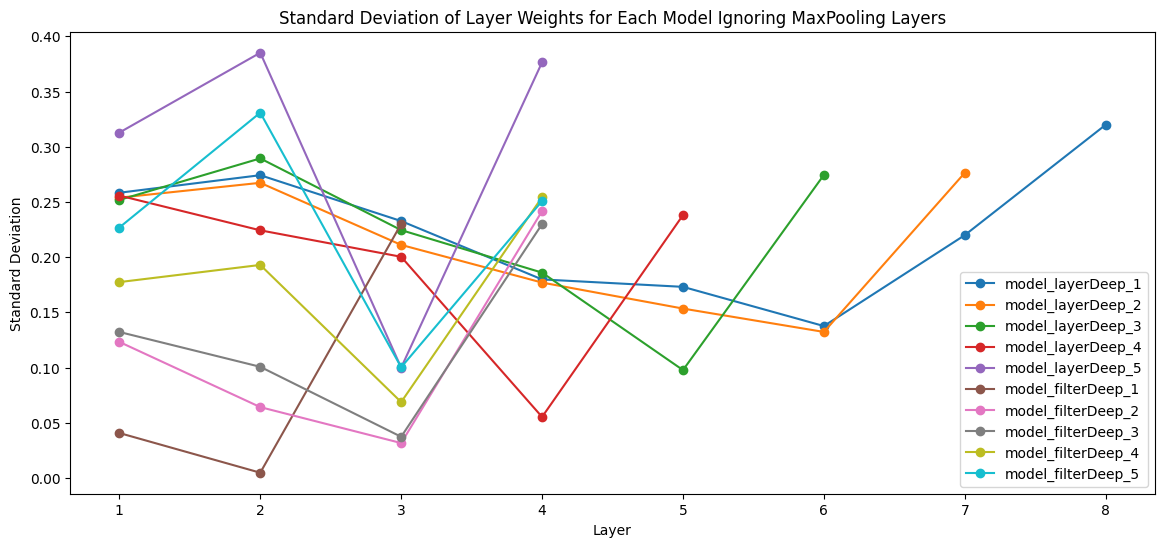

In [61]:
# Create a new figure
plt.figure(figsize=(14, 6))

# Iterate over the standard deviations for each model
for i, std_devs in enumerate(std_devs_all_models):
    # Create a list of layer indices
    layers = range(1, len(std_devs) + 1)

    # Plot the standard deviations for the current model
    plt.plot(layers, std_devs, marker='o', label=model_names[i])

# Add title and labels
plt.title('Standard Deviation of Layer Weights for Each Model Ignoring MaxPooling Layers')
plt.xlabel('Layer')
plt.ylabel('Standard Deviation')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [63]:
# Create a list of model names
model_names = ['model_layerDeep_1', 'model_layerDeep_2', 'model_layerDeep_3', 'model_layerDeep_4','model_layerDeep_5',
               'model_filterDeep_1', 'model_filterDeep_2', 'model_filterDeep_3', 'model_filterDeep_4', 'model_filterDeep_5']

# Iterate over each model
for j, model in enumerate(models):
    # Get the weights of the model
    model_weights = model.get_weights()

    # Iterate over the weights of each layer
    for i, layer_weights in enumerate(model_weights):
        # Check if the layer weights have 4 dimensions
        if len(layer_weights.shape) == 4:
            # Check if the total number of elements is a multiple of 4
            if np.prod(layer_weights.shape) % 4 == 0:
                # Reshape the weights to have 4 dimensions
                reshaped_weights = layer_weights.reshape(-1, 4)

                # Create a 3D scatter plot
                fig = plt.figure()
                ax = fig.add_subplot(111, projection='3d')

                # Use the first three dimensions for the x, y, and z coordinates
                x = reshaped_weights[:, 0]
                y = reshaped_weights[:, 1]
                z = reshaped_weights[:, 2]

                # Use the fourth dimension for the color
                colors = reshaped_weights[:, 3]

                # Set opacity with alpha (e.g., alpha=0.3 for semi-transparent)
                sc = ax.scatter(x, y, z, c=colors, alpha=0.3)

                # Add a colorbar
                plt.colorbar(sc)

                plt.title(f'{model_names[j]} Layer {i+1} Weights')
                plt.show()
            else:
                print(f"{model_names[j]} Layer {i+1} weights cannot be reshaped into (-1, 4)")
        else:
            print(f"{model_names[j]} Layer {i+1} does not have weights or biases")


Output hidden; open in https://colab.research.google.com to view.